#Ornamental Plants Image Classification

## Name: Kavin Fidel J

## ID: 210100007

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(41)
import numpy as np
np.random.seed(41)
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image
from numpy import save

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = []
y = []


In [ ]:
# Taking 40%  of the images from each folder
dam_rose = glob.glob("/content/drive/MyDrive/Deep Learning/Ornamental_Plants/Damask Rose/*.jpeg")
rain_lily = glob.glob("/content/drive/MyDrive/Deep Learning/Ornamental_Plants/Rain Lily/*.jpeg")
echeveria = glob.glob("/content/drive/MyDrive/Deep Learning/Ornamental_Plants/Echeveria Flower/*.jpg")
mirabilis = glob.glob("/content/drive/MyDrive/Deep Learning/Ornamental_Plants/Mirabilis Jalapa/*.jpg")
zinnia = glob.glob("/content/drive/MyDrive/Deep Learning/Ornamental_Plants/Zinnia Elegans/*.jpg")

total_drose = len(dam_rose)
total_rlily = len(rain_lily)
total_eflower = len(echeveria)
total_mjalapa = len(mirabilis)
total_zelegans = len(zinnia)


ImgFiles = dam_rose[:round(0.4*total_drose)] + rain_lily[:round(0.4*total_rlily)] + echeveria[:round(0.4*total_eflower)] + mirabilis[:round(0.4*total_mjalapa)] + zinnia[:round(0.4*total_zelegans)]

for items in ImgFiles[:5]:
    print(items)


/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (463).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (112).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (406).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (464).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (184).jpeg


In [ ]:
X = []
y = []
for filename in ImgFiles:
  X_i = Image.open(filename)
  X_i = X_i.resize((299,299))
  X_i = np.array(X_i)/255.0

  X.append(X_i)
  label = filename.split("/")
  y_i = label[-2]
  y.append(y_i)

In [ ]:
print(set(y))
print(len(y))

{'Damask Rose', 'Mirabilis Jalapa', 'Rain Lily', 'Echeveria Flower', 'Zinnia Elegans'}
850


In [ ]:

from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

print(set(y))
print(lEncoder.classes_)

{0, 1, 2, 3, 4}
['Damask Rose' 'Echeveria Flower' 'Mirabilis Jalapa' 'Rain Lily'
 'Zinnia Elegans']


In [ ]:


X = np.array(X)

y = np.array(y)

print(X.shape)
print(y.shape)

(850, 299, 299, 3)
(850,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.25,
                                        stratify = y,
                                                    random_state=42)


print("X_train_shape: {}".format(X_train.shape))
print("X_test_shape: {}".format(X_test.shape))

X_train_shape: (637, 299, 299, 3)
X_test_shape: (213, 299, 299, 3)


In [ ]:

mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std
X_test_std = (X_test-mu)/std

In [ ]:
base_model = keras.applications.InceptionResNetV2(
                include_top=False,
                weights="imagenet"
)

# Freeze the weights - will not be updated during backpropagation
for layer in base_model.layers:
  layer.trainable = False

# Adding classifier
global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)

x = keras.layers.BatchNormalization()(global_pool)
x = keras.layers.Dropout(0.25)(x)

output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model1_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
model1_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks1_TL = [
             keras.callbacks.ModelCheckpoint("bestTL1.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history1_TL = model1_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks1_TL)

Epoch 1/10
36/36 [==============================] - 40s 558ms/step - loss: 0.5682 - accuracy: 0.7941 - val_loss: 0.5726 - val_accuracy: 0.8594
Epoch 2/10
36/36 [==============================] - 10s 270ms/step - loss: 0.0707 - accuracy: 0.9825 - val_loss: 0.2378 - val_accuracy: 1.0000
Epoch 3/10
36/36 [==============================] - 7s 182ms/step - loss: 0.0444 - accuracy: 0.9878 - val_loss: 0.1435 - val_accuracy: 1.0000
Epoch 4/10
36/36 [==============================] - 7s 185ms/step - loss: 0.0275 - accuracy: 0.9948 - val_loss: 0.0821 - val_accuracy: 1.0000
Epoch 5/10
36/36 [==============================] - 7s 185ms/step - loss: 0.0162 - accuracy: 0.9965 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 6/10
36/36 [==============================] - 7s 186ms/step - loss: 0.0150 - accuracy: 0.9983 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 7/10
36/36 [==============================] - 7s 190ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoc

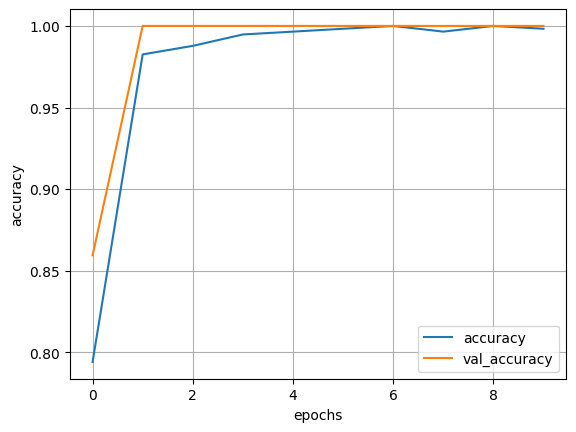

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history1_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
y_proba = model1_TL.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

7/7 [==============================] - 16s 1s/step
[4 4 2 3 3 0 4 1 1 3 1 1 0 4 4 4 0 0 2 2 1 0 2 0 4 1 4 1 0 4 0 2 0 4 0 2 2
 4 0 0 1 2 2 4 2 1 1 3 2 4 4 3 2 4 3 1 1 0 2 0 2 2 4 0 2 2 0 2 1 0 3 3 4 3
 2 2 1 0 4 4 0 2 0 0 2 4 1 0 4 1 2 4 2 3 4 2 0 4 0 3 3 1 1 4 3 1 2 1 4 1 1
 0 1 1 2 0 2 1 1 3 4 1 2 0 4 2 0 0 2 2 0 1 0 2 4 0 3 0 0 1 4 4 0 1 4 3 2 4
 0 3 1 1 1 1 2 0 0 1 3 4 3 1 4 2 1 4 0 4 2 1 0 1 0 2 1 2 1 0 2 2 0 0 0 0 3
 1 3 2 0 4 1 4 2 0 1 2 2 1 1 1 2 2 0 3 0 2 1 1 4 3 2 1 2]


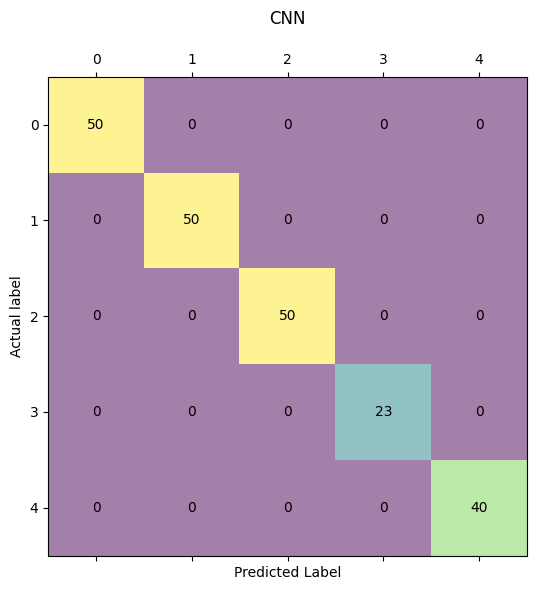

{0, 1, 2, 3, 4}
['Damask Rose' 'Echeveria Flower' 'Mirabilis Jalapa' 'Rain Lily'
 'Zinnia Elegans']


In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, alpha=0.5)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')

plt.tight_layout()
plt.show()

print(set(y))
print(lEncoder.classes_)

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  1.0
Recall:  1.0
F1-score:  1.0


In [ ]:
model1_TL.save("/content/drive/MyDrive/Deep Learning/Models/Model1_TL.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Saving the Training and the testing data
save("/content/drive/MyDrive/Deep Learning/Models/X_train1_std.npy",X_train_std)
save("/content/drive/MyDrive/Deep Learning/Models/X_test1_std.npy",X_test_std)
# Saving the y labels
save("/content/drive/MyDrive/Deep Learning/Models/y_train1.npy",y_train)
save("/content/drive/MyDrive/Deep Learning/Models/y_test1.npy",y_test)